# Exploring and Preparing Data

## Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [18]:
df = pd.read_csv('dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Scatter Plot FlightNumber vs. PayloadMass

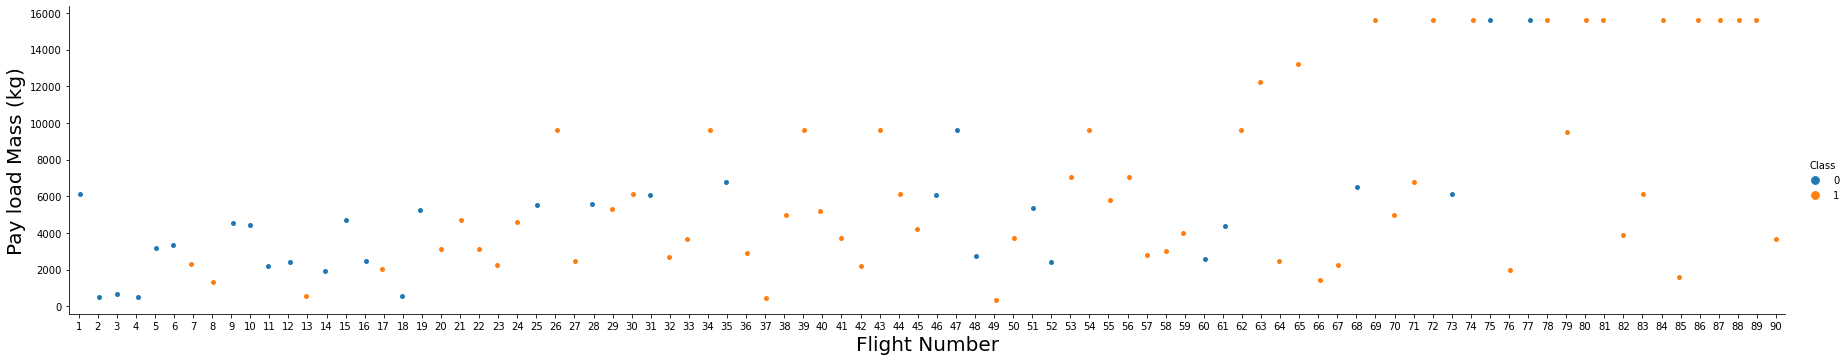

In [19]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## Visualizing the relationship between Flight Number and Launch Site

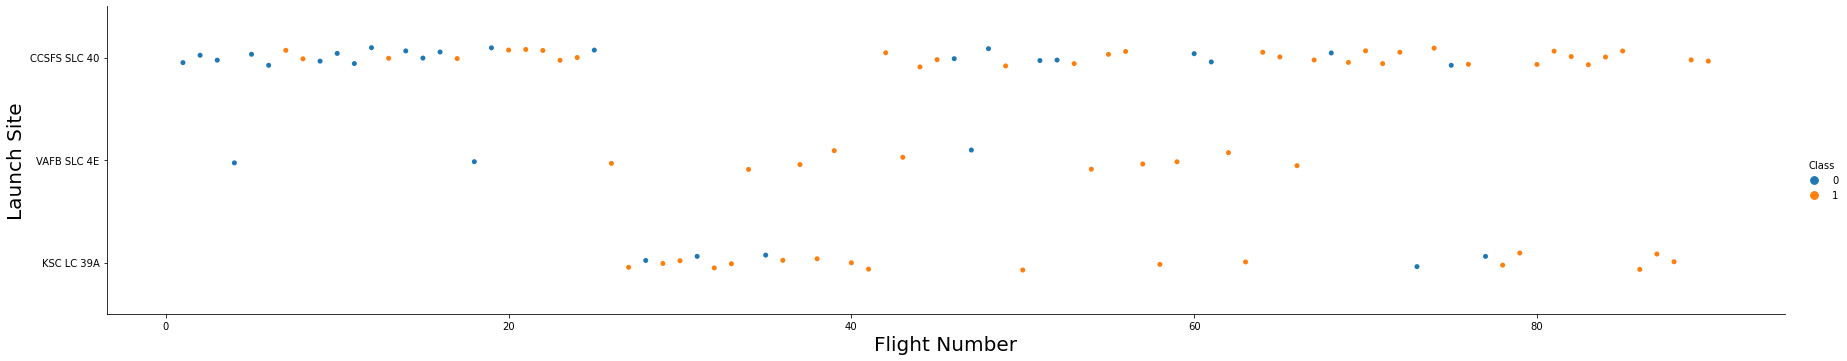

In [20]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

## Visualizing the relationship between Payload and Launch Site

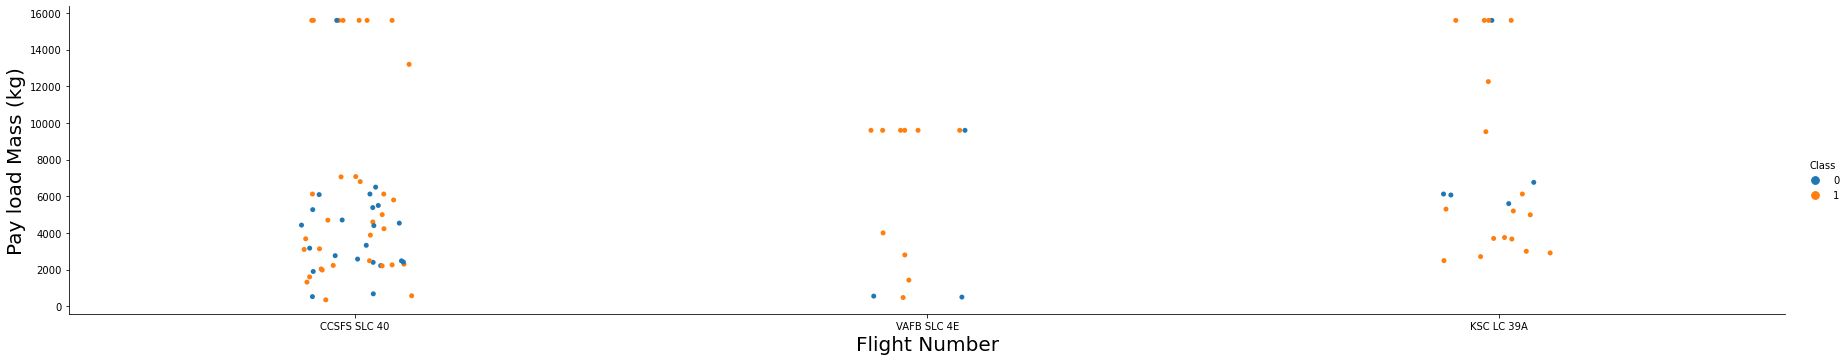

In [21]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## Visualizing the relationship between success rate of each orbit type

<AxesSubplot:xlabel='Orbit', ylabel='Class'>

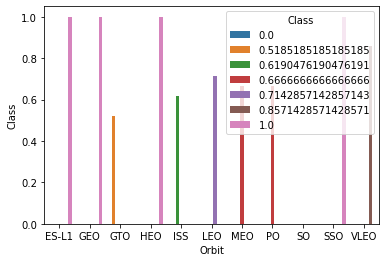

In [22]:
orbit_success = df.groupby('Orbit').mean()
orbit_success.reset_index(inplace=True)
sns.barplot(x="Orbit",y="Class",data=orbit_success,hue='Class')

## Visualizing the relationship between FlightNumber and Orbit type

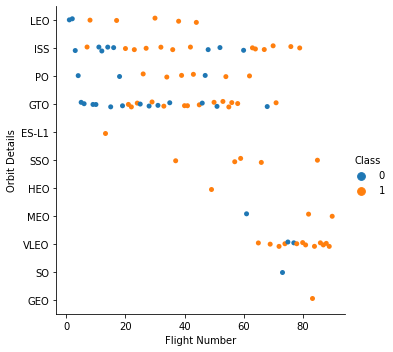

In [23]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber',y='Orbit',data=df,hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Details')
plt.show()

## Visualizing the relationship between Payload and Orbit type

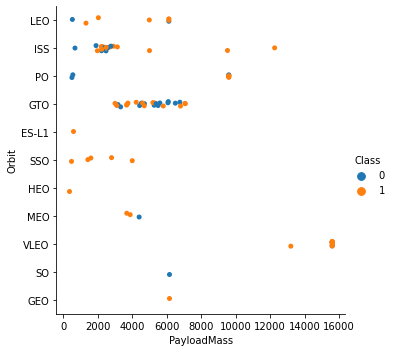

In [24]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='PayloadMass',y='Orbit',data=df,hue='Class')
plt.xlabel('PayloadMass')
plt.ylabel('Orbit')
plt.show()

## Visualizing the launch success yearly trend

In [25]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year(1)
df["Year"]=year
average_by_year = df.groupby(by="Year").mean()
average_by_year.reset_index(inplace=True)

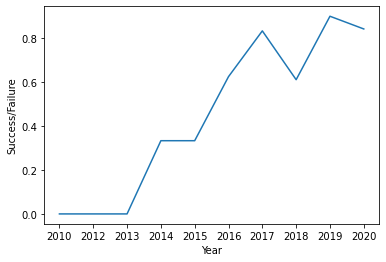

In [26]:
plt.plot(average_by_year["Year"],average_by_year["Class"])
plt.xlabel("Year")
plt.ylabel("Success/Failure")
plt.show()

## Features Engineering

In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## Creating dummy variables to categorical columns

In [28]:
features_one_hot=pd.get_dummies(features, columns=['Orbit','LaunchSite', 'LandingPad', 'Serial'])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,True,True,True,5.0,11,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15600.000000,3,True,True,True,5.0,11,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15600.000000,6,True,True,True,5.0,11,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15600.000000,3,True,True,True,5.0,11,0,0,...,0,0,0,0,0,0,0,0,1,0


## Cast all numeric columns to float64

In [29]:
features_one_hot = features_one_hot.astype('float64')

## Saving the Updated dataset in CSV file for modelling

In [31]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)